# Presetnacion Evidencia AA3-EV02 
## Carlos Nicolas Lopez Cortes

El presente notebookc contiene el procesos ejecutado y explicado de imporacion, limpieza y exploracion de datos requerido en el Estudio de caso: análisis exploratorio de datos.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##  Importacion de los datos        

In [63]:
df = pd.read_csv('C:\\Users\\moonw\\Documents\\Sena\\Analisis exploratorio de datos Python\\Actividades y ajercicios\\Ejercicios 3\\Anexos\\Data_Caso_Propuesto.csv')
df

,Codigo,Ciudad,Departamento,Barrio,Direccion,Area Terreno,Area Construida,Detalle Disponibilidad,Estrato,Precio,Tipo de Inmueble,Datos Adicionales
0,17180,BOGOTA,CUNDINAMARCA,NaN,AV CR 7 NO. 166 - 51 LT B,0.00,0.0,COMERCIALIZABLE CON RESTRICCION,TRES,2.958081e+10,LOTE COMERCIAL,ESTE INMUEBLE SE COMERCIALIZARÁ A TRAVES DE SUBASTA ESPECIAL
1,19292,BOGOTA,CUNDINAMARCA,NaN,CL 72 No. 12 - 77,0.00,0.0,COMERCIALIZABLE,COMERCIAL,1.646059e+10,EDIFICIO,NaN
2,19292,BOGOTA,CUNDINAMARCA,NaN,CL 72 No. 12 - 77,0.00,0.0,COMERCIALIZABLE VENTA ANTICIPADA,COMERCIAL,1.646059e+10,EDIFICIO,NaN
3,2575,SOGAMOSO,BOYACÁ,CENTRO,CRA. 10 #11- 78/80 Ó CL 12 # 9 - 77/85 Ó CALLE 12 # 9 - 65/73 - SOGAMOSO,1655.08,7269.0,COMERCIALIZABLE CON RESTRICCION,CUATRO,1.376828e+10,CLINICA,ESTE INMUEBLE SE COMERCIALIZARÁ A TRAVÉS DE SUBASTA PÚBLICA
4,11409,BUGA,VALLE DEL CAUCA,VEREDA CHAMBIMBAL,LT A1-A24 B1-B79 C1-C51 D1-D9 STA ROSA LT1-46 LT 1-7 1-10 1-11 KR 8 -37,3217197.00,22724.0,COMERCIALIZABLE FIDUCIA,RURAL,4.523379e+10,LOTE MIXTO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
458,12709,CALI,VALLE DEL CAUCA,PRADOS DEL NORTE,CL 30N # 2B-38 LOCAL 562 CENTRO COMERCIAL SANTIAGO,0.00,0.0,COMERCIALIZABLE CON RESTRICCION,CUATRO,2.960534e+07,LOCAL,"¡OPORTUNIDAD PARA INVERTIR! LOCAL EN PROINDIVISO, UBICADO EN EL NORTE DE CALI CON CERCANIA A PUNTOS INTERES COMO LA TERMINAL DE TRANSPORTES, COLEGIO HISPANOAMERICANO, EL VIVERO MUNICIPAL, EL MONUMENTO A LA SOLIDARIDAD, CLUB COLOMBIA Y PARQUE VERSALLE"
459,17992,BOGOTA,CUNDINAMARCA,NaN,CR 70 NO. 49-77,0.00,0.0,COMERCIALIZABLE CON RESTRICCION,CUATRO,1.448242e+09,CASA,NaN
460,12708,CALI,VALLE DEL CAUCA,PRADOS DEL NORTE,CL 30N # 2B-38 LOCAL 564 CENTRO COMERCIAL SANTIAGO,0.00,0.0,COMERCIALIZABLE CON RESTRICCION,CUATRO,2.070134e+07,LOCAL,"¡OPORTUNIDAD PARA INVERTIR! LOCAL EN PROINDIVISO, UBICADO EN EL NORTE DE CALI CON CERCANIA A PUNTOS INTERES COMO LA TERMINAL DE TRANSPORTES, COLEGIO HISPANOAMERICANO, EL VIVERO MUNICIPAL, EL MONUMENTO A LA SOLIDARIDAD, CLUB COLOMBIA Y PARQUE VERSALLE"
461,12706,CALI,VALLE DEL CAUCA,PRADOS DEL NORTE,CL 30N # 2B-38 LOCAL 367 CENTRO COMERCIAL SANTIAGO,0.00,0.0,COMERCIALIZABLE CON RESTRICCION,CUATRO,2.060800e+07,LOCAL,"¡OPORTUNIDAD PARA INVERTIR! LOCAL EN PROINDIVISO, UBICADO EN EL NORTE DE CALI CON CERCANIA A PUNTOS INTERES COMO LA TERMINAL DE TRANSPORTES, COLEGIO HISPANOAMERICANO, EL VIVERO MUNICIPAL, EL MONUMENTO A LA SOLIDARIDAD, CLUB COLOMBIA Y PARQUE VERSALLE"


## Pregunta objetivo

Teniendo en cuenta el tipo de datos presente en la base de datos **Inmuebles Disponibles Para La Venta** La pregunta planteada es:

* ¿Cuales son las caracteristicas y relaciones que influyen en el precio?


### Exploracion de los datos

In [26]:
df.groupby('Detalle Disponibilidad')['Detalle Disponibilidad'].count()

Detalle Disponibilidad
COMERCIALIZABLE                     289
COMERCIALIZABLE CON RESTRICCION      83
COMERCIALIZABLE FIDUCIA              13
COMERCIALIZABLE TERCEROS             41
COMERCIALIZABLE VENTA ANTICIPADA     14
EN PUJA                              23
Name: Detalle Disponibilidad, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Codigo                  463 non-null    int64  
 1   Ciudad                  463 non-null    object 
 2   Departamento            463 non-null    object 
 3   Barrio                  40 non-null     object 
 4   Direccion               463 non-null    object 
 5   Area Terreno            463 non-null    float64
 6   Area Construida         463 non-null    float64
 7   Detalle Disponibilidad  463 non-null    object 
 8   Estrato                 463 non-null    object 
 9   Precio                  463 non-null    float64
 10  Tipo de Inmueble        463 non-null    object 
 11  Datos Adicionales       118 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 43.5+ KB


In [28]:
print(f'El total de los registros es: {df.shape[0]}', f'\n\ny elt total de columnas es: {df.shape[1]}')

El total de los registros es: 463 

y elt total de columnas es: 12


Exploracion de valores nulos

In [29]:
categoricos = ['barrio','ciudad', 'estrato', 'tipo de inmueble', 'Detalle disponibilidad'] 
numericos = ['Area construida','Area terreno', 'precio']

print(f'Las variables categoricas son: {categoricos}', f'\n\nLas variables numericas son {numericos}')

Las variables categoricas son: ['barrio', 'ciudad', 'estrato', 'tipo de inmueble', 'Detalle disponibilidad'] 

Las variables numericas son ['Area construida', 'Area terreno', 'precio']


In [30]:
df.isnull().sum()

Codigo                      0
Ciudad                      0
Departamento                0
Barrio                    423
Direccion                   0
Area Terreno                0
Area Construida             0
Detalle Disponibilidad      0
Estrato                     0
Precio                      0
Tipo de Inmueble            0
Datos Adicionales         345
dtype: int64

Se evidencia que en las columnas: **Barrio** y **Datos  Adicionales**  de los cuales se decide precindir de estas columnas, ya que  no aportan mayor valor a el desarrollo de este analisis. 
    

In [31]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Codigo                  463 non-null    int64  
 1   Ciudad                  463 non-null    object 
 2   Departamento            463 non-null    object 
 3   Barrio                  40 non-null     object 
 4   Direccion               463 non-null    object 
 5   Area Terreno            463 non-null    float64
 6   Area Construida         463 non-null    float64
 7   Detalle Disponibilidad  463 non-null    object 
 8   Estrato                 463 non-null    object 
 9   Precio                  463 non-null    float64
 10  Tipo de Inmueble        463 non-null    object 
 11  Datos Adicionales       118 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 43.5+ KB


In [34]:
df = df.drop(columns=['Datos Adicionales', 'Barrio'], )

KeyError: "['Datos Adicionales', 'Barrio'] not found in axis"

In [41]:
informe_estadistico = df.describe()
informe_estadistico

,Codigo,Area Terreno,Area Construida,Precio
count,463.000000,4.630000e+02,463.000000,4.630000e+02
mean,18003.151188,1.515204e+04,87.517279,6.672032e+08
std,1992.191499,1.827101e+05,1137.469077,3.272992e+09
min,2575.000000,0.000000e+00,0.000000,4.650000e+06
25%,18184.500000,0.000000e+00,0.000000,1.230500e+07
50%,18332.000000,0.000000e+00,0.000000,1.587000e+07
75%,18539.500000,0.000000e+00,0.000000,1.379955e+08
max,19344.000000,3.217197e+06,22724.000000,4.523379e+10


In [56]:
df['Codigo'] = df['Codigo'].astype('str')

BUsqueda de valores erroneos

In [66]:
print(df['Estrato'].unique(), '\n\n')
print(df['Tipo de Inmueble'].unique(), '\n\n')
print(df['Precio'].describe())

['TRES' 'COMERCIAL' 'CUATRO' 'RURAL' 'INDUSTRIAL' 'SEIS' 'CINCO' 'DOS'
 'UNO'] 


['LOTE COMERCIAL' 'EDIFICIO' 'CLINICA' 'LOTE MIXTO'
 'LOTE CON CONSTRUCCION' 'HOTEL' 'BODEGA' 'APARTAMENTO' 'LOTE VIVIENDA'
 'FINCA' 'EDIFICIO OFICINAS' 'CASA' 'LOCAL' 'LOTE INDUSTRIAL' 'LOTE'
 'OFICINA' 'GARAJE' 'DEPOSITO' 'LOTE AGRICOLA'] 


count    4.630000e+02
mean     6.672032e+08
std      3.272992e+09
min      4.650000e+06
25%      1.230500e+07
50%      1.587000e+07
75%      1.379955e+08
max      4.523379e+10
Name: Precio, dtype: float64


No hay valores erroneos 

### Identifiar valores atipicos y Graficos

Para la comprencion de relaciones entre variables que se relaiconene de forma directa con el precio, Se evaluaran variables como que se entiende tienen relacion con el precio de cualquier inmueble como lo son: 

* Area Terreno
* Area Construida
* Estrato
* Tipo de inmueble



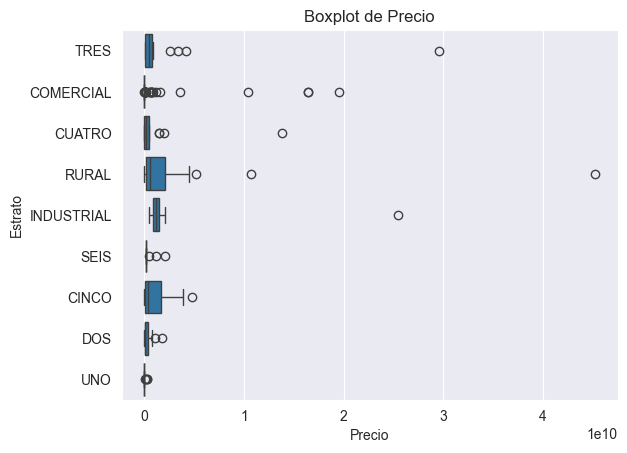

In [75]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Precio'], y=df['Estrato'] )
plt.title('Boxplot de Precio')
plt.show()



## De este BoxPlot podemos concluir que:

### Estrato TRES:

**Distribución de Precios**: La mediana del precio se encuentra en el extremo inferior del rango de precios, indicando que la mayoría de los inmuebles en esta categoría tienen precios bajos.

**Valores Atípicos**: Hay varios valores atípicos elevados, sugiriendo que aunque la mayoría de los inmuebles tienen precios bajos, hay algunos con precios excepcionalmente altos.

### COMERCIAL:

**Distribución de Precios**: Los precios de los inmuebles comerciales están más concentrados, lo que indica una menor variabilidad en esta categoría.

**Valores Atípicos**: Hay algunos valores atípicos hacia los extremos, pero en general, los precios son más consistentes y no tan altos como en otras categorías.

### CUATRO:

**Distribución de Precios**: Esta categoría tiene una amplia gama de precios, con una mediana más elevada en comparación con TRES y COMERCIAL.

**Valores Atípicos**: Existen varios valores atípicos, lo que sugiere que algunos inmuebles en esta categoría tienen precios excepcionalmente altos.

### RURAL:

**Distribución de Precios**: Los precios en la categoría rural son muy variables, indicando una gran diversidad en el tipo de inmuebles que se incluyen bajo esta categoría.

**Valores Atípicos**: Numerosos valores atípicos elevados sugieren que hay propiedades rurales con precios significativamente altos.

### INDUSTRIAL:

**Distribución de Precios**: Los precios en esta categoría son bastante concentrados, lo que indica una menor variabilidad.

**Valores Atípicos**: Aunque la mediana y el rango intercuartil son más bajos, hay valores atípicos que indican algunos inmuebles industriales con precios altos.

### SEIS:

**Distribución de Precios**: Al igual que INDUSTRIAL, SEIS tiene una menor variabilidad en los precios.

**Valores Atípicos**: Aunque hay menos dispersión, hay algunos precios excepcionalmente altos.

### CINCO:

**Distribución de Precios**: Similar a SEIS, con una distribución de precios concentrada.

**Valores Atípicos**: Algunos valores atípicos elevados, pero menos dispersión en comparación con CUATRO y RURAL.

### DOS:

**Distribución de Precios**: Esta categoría muestra una concentración de precios similar a CINCO y SEIS.

**Valores Atípicos**: Hay pocos valores atípicos, lo que sugiere que los precios en esta categoría son más consistentes.

### UNO:

**Distribución de Precios**: Los precios en esta categoría están muy concentrados, con menos dispersión.

**Valores Atípicos**: Pocos valores atípicos indican una mayor consistencia en los precios.

### Observaciones Generales:

- Las categorías con una mayor dispersión de precios (TRES, CUATRO, y RURAL) muestran que hay una mayor diversidad en los tipos de inmuebles y sus precios.
- Las categorías con menor dispersión (COMERCIAL, INDUSTRIAL, SEIS, CINCO, DOS, UNO) indican una mayor consistencia en los precios de los inmuebles.
- La presencia de valores atípicos en casi todas las categorías sugiere que hay excepciones significativas en los precios dentro de cada categoría, que podrían ser analizadas más a fondo para entender las razones detrás de estos precios anómalos (por ejemplo, ubicaciones premium, tamaño del inmueble, etc.).


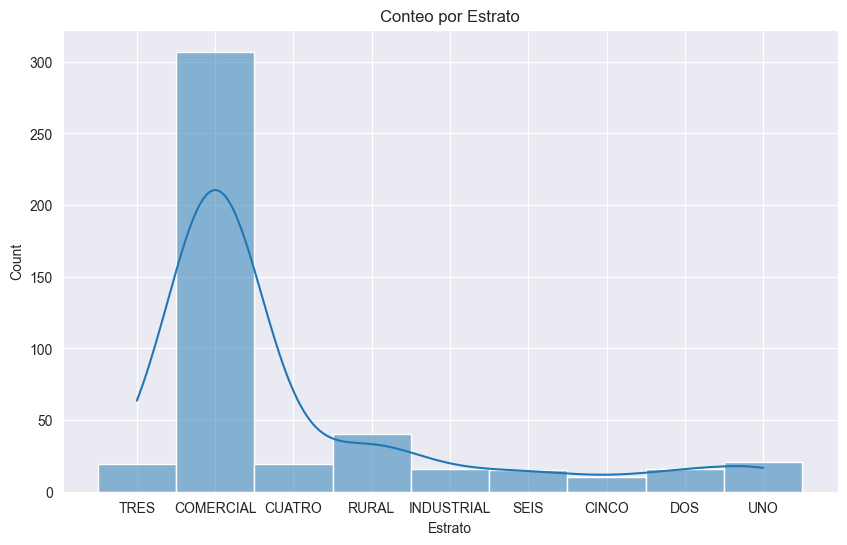

In [85]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Estrato'], bins=30, kde=True, legend=True)
plt.title('Conteo por Estrato')
plt.show()


## Analisis histograma y comparacion con Boxplot

### Estrato TRES:

**Distribución de Precios:** La mediana del precio se encuentra en el extremo inferior del rango de precios, indicando que la mayoría de los inmuebles en esta categoría tienen precios bajos.
**Valores Atípicos:** Hay varios valores atípicos elevados, sugiriendo que aunque la mayoría de los inmuebles tienen precios bajos, hay algunos con precios excepcionalmente altos.

### Estrato COMERCIAL:

**Distribución de Precios:** Los precios de los inmuebles comerciales están más concentrados, lo que indica una menor variabilidad en esta categoría.
**Valores Atípicos:** Hay algunos valores atípicos hacia los extremos, pero en general, los precios son más consistentes y no tan altos como en otras categorías.

### Estrato CUATRO:

**Distribución de Precios:** Esta categoría tiene una amplia gama de precios, con una mediana más elevada en comparación con TRES y COMERCIAL.
**Valores Atípicos:** Existen varios valores atípicos, lo que sugiere que algunos inmuebles en esta categoría tienen precios excepcionalmente altos.

### Estrato RURAL:

**Distribución de Precios:** Los precios en la categoría rural son muy variables, indicando una gran diversidad en el tipo de inmuebles que se incluyen bajo esta categoría.
**Valores Atípicos:** Numerosos valores atípicos elevados sugieren que hay propiedades rurales con precios significativamente altos.

### Estrato INDUSTRIAL:

**Distribución de Precios:** Los precios en esta categoría son bastante concentrados, lo que indica una menor variabilidad.
**Valores Atípicos:** Aunque la mediana y el rango intercuartil son más bajos, hay valores atípicos que indican algunos inmuebles industriales con precios altos.

### Estrato SEIS:

**Distribución de Precios:** Al igual que INDUSTRIAL, SEIS tiene una menor variabilidad en los precios.
**Valores Atípicos:** Aunque hay menos dispersión, hay algunos precios excepcionalmente altos.

### Estrato CINCO:

**Distribución de Precios:** Similar a SEIS, con una distribución de precios concentrada.
**Valores Atípicos:** Algunos valores atípicos elevados, pero menos dispersión en comparación con CUATRO y RURAL.

### Estrato DOS:

**Distribución de Precios:** Esta categoría muestra una concentración de precios similar a CINCO y SEIS.
**Valores Atípicos:** Hay pocos valores atípicos, lo que sugiere que los precios en esta categoría son más consistentes.

### Estrato UNO:

**Distribución de Precios:** Los precios en esta categoría están muy concentrados, con menos dispersión.
**Valores Atípicos:** Pocos valores atípicos indican una mayor consistencia en los precios.

### Observaciones Generales:

- Las categorías con una mayor dispersión de precios (TRES, CUATRO, y RURAL) muestran que hay una mayor diversidad en los tipos de inmuebles y sus precios.
- Las categorías con menor dispersión (COMERCIAL, INDUSTRIAL, SEIS, CINCO, DOS, UNO) indican una mayor consistencia en los precios de los inmuebles.
- La presencia de valores atípicos en casi todas las categorías sugiere que hay excepciones significativas en los precios dentro de cada categoría, que podrían ser analizadas más a fondo para entender las razones detrás de estos precios anómalos (por ejemplo, ubicaciones premium, tamaño del inmueble, etc.).
